In [1]:
import _init_paths
from datasets.dataset_factory import get_dataset
from opts import opts

import torch.nn as nn
import torch
from models.utils import _gather_feat, _transpose_and_gather_feat

import tqdm
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
def transform_img(img):
    mean = np.array([0.485, 0.456, 0.406], np.float32).reshape(1, 1, 3)
    std = np.array([0.229, 0.224, 0.225], np.float32).reshape(1, 1, 3)
    img = img.transpose(1,2,0)
    img = img * std + mean
    img = img*255
    img = img.astype(int)
    img = img[:,:,::-1]
    
    img = img.astype(np.uint8)
    return img

def draw_bbox(img,xmin,ymin,xmax,ymax,color=(0,0,255),thickness=1):
    img = cv2.rectangle(img, (int(xmin),int(ymin)), (int(xmax),int(ymax)),color,thickness)
    return img

In [3]:
Dataset = get_dataset('fish_sim', 'fish')

In [4]:
opt = opts().init(['fish','--exp_id','3dop','--dataset','fish_sim','--kitti_split','3dop','--batch_size','8','--num_epochs','70','--lr_step','45,60','--gpus','0'])
opt = opts().update_dataset_info_and_set_heads(opt, Dataset)

Fix size testing.
training chunk_sizes: [8]
The output will be saved to  /home/alfin/Documents/deep_learning/production/centernet_3d_fish/src/lib/../../exp/fish/3dop
heads {'hm': 1, 'reg': 2, 'dep': 1, 'dim': 3, 'rot': 4, 'wh': 2, 'reid': 128}
heads {'hm': 1, 'reg': 2, 'dep': 1, 'dim': 3, 'rot': 4, 'wh': 2, 'reid': 128}


In [5]:
dataset = Dataset(opt, 'train')

==> initializing fish 3dop, train data.
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loaded train 300 samples


In [6]:
dataset[0].keys()

dict_keys(['input', 'hm', 'reg', 'reg_mask', 'ind', 'dep', 'dim', 'rot', 'wh', 'reid'])

In [7]:
cxs = list()
cys = list()

import warnings
warnings.simplefilter('error')

In [8]:
# for i,ds in enumerate(dataset):
#     print(ds['ct'])
#     continue
#     for ct in ds['ct']:
#         cxs.append(int(ct[0]))
#         cys.append(int(ct[1]))
#     hm = (np.moveaxis(ds['hm'], 0, -1)*255).astype(int)
#     img = transform_img(ds['input'])
#     print(i)

#     f, axarr = plt.subplots(1,2)
#     axarr[0].imshow(hm)
#     axarr[1].imshow(img)

In [9]:
len(dataset)

300

In [10]:
ds = dataset[0]
hm = (np.moveaxis(ds['hm'], 0, -1)*255).astype(int)
img = transform_img(ds['input'])

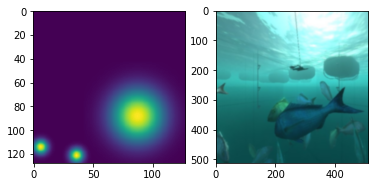

In [11]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(hm)
axarr[1].imshow(img)

In [12]:
ds['rot'][:5]

array([[-0.28542122,  0.5966719 , -0.23962635, -0.7107015 ],
       [-0.49870205, -0.49879768, -0.5353351 ,  0.46466488],
       [-0.20066886,  0.34465906, -0.07567815, -0.913901  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [13]:
ds['reid'][0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)